In [2]:
import pandas as pd
import numpy as np
from difflib import SequenceMatcher
import regex as re
import itertools
import pycountry_convert as pc
import seaborn as sns
import matplotlib.pyplot as plt

# -------------- OPTIONS -------------- # 
pd.set_option('display.max_columns', None)

In [3]:
def display_valuecounts(df,colonne):
    for i in colonne:
        print("Colonna: " + i + "\n")
        print(df[i].value_counts())
        print("\n")

In [4]:
df = pd.read_csv('FAO.csv', encoding="latin-1")
df.head(2)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,1963.0,2215.0,2310.0,2335.0,2434.0,2512.0,2282.0,2454.0,2443.0,2129.0,2133.0,2068.0,1994.0,1851.0,1791.0,1683.0,2194.0,1801.0,1754.0,1640.0,1539.0,1582.0,1840.0,1855.0,1853.0,2177.0,2343.0,2407.0,2463.0,2600.0,2668.0,2776.0,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,205.0,233.0,246.0,246.0,255.0,263.0,235.0,254.0,270.0,259.0,248.0,217.0,217.0,197.0,186.0,200.0,193.0,202.0,191.0,199.0,197.0,249.0,218.0,260.0,319.0,254.0,326.0,347.0,270.0,372.0,411.0,448.0,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422


In [5]:
df.columns

Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')

In [6]:
display_valuecounts(df,df.columns)

Colonna: Area Abbreviation

CHN    541
THA    261
AZE    240
ESP    150
ITA    148
      ... 
GNB     91
TKM     90
TLS     86
AFG     83
LSO     75
Name: Area Abbreviation, Length: 169, dtype: int64


Colonna: Area Code

203    150
106    148
79     147
41     146
110    143
      ... 
193     91
213     90
176     86
2       83
122     75
Name: Area Code, Length: 174, dtype: int64


Colonna: Area

Spain                    150
Italy                    148
Germany                  147
China, mainland          146
Japan                    143
                        ... 
Sao Tome and Principe     91
Turkmenistan              90
Timor-Leste               86
Afghanistan               83
Lesotho                   75
Name: Area, Length: 174, dtype: int64


Colonna: Item Code

2905    347
2960    337
2514    333
2763    328
2913    314
       ... 
2541     32
2562     24
2559     21
2581     18
2768      3
Name: Item Code, Length: 117, dtype: int64


Colonna: Item

Milk - Excluding Butter   

In [7]:
df2 = pd.read_csv('Food_Production.csv')
df2.head(3)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df2.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

In [9]:
display_valuecounts(df2,df2.columns)

Colonna: Food product

Wheat & Rye (Bread)    1
Dark Chocolate         1
Other Vegetables       1
Citrus Fruit           1
Bananas                1
Apples                 1
Berries & Grapes       1
Wine                   1
Other Fruit            1
Coffee                 1
Beef (beef herd)       1
Root Vegetables        1
Beef (dairy herd)      1
Lamb & Mutton          1
Pig Meat               1
Poultry Meat           1
Milk                   1
Cheese                 1
Eggs                   1
Fish (farmed)          1
Brassicas              1
Onions & Leeks         1
Maize (Meal)           1
Peas                   1
Barley (Beer)          1
Oatmeal                1
Rice                   1
Potatoes               1
Cassava                1
Cane Sugar             1
Beet Sugar             1
Other Pulses           1
Nuts                   1
Tomatoes               1
Groundnuts             1
Soymilk                1
Tofu                   1
Soybean Oil            1
Palm Oil               1
Su

Scarcity-weighted

https://www.sciencedirect.com/science/article/pii/S0048969720375239
<br>

<br>

</br>

</br>
Eutrophying emissions

https://ourworldindata.org/grapher/eutrophying-emissions-per-kg-poore

https://ourworldindata.org/grapher/eutrophying-emissions-kcal

https://www.emep.int/mscw/pollutants.html
<br>

<br>

</br>

</br>
Freshwater withdrawals

https://data.oecd.org/water/water-withdrawals.htm

In [10]:
#pulisce i nomi dei prodotti in df2 per effettuare la ricerca di similarità
def clean(item):
    items = item.split('&')
    items = [x.split('(')[0] for x in items]
    items = [x.strip() for x in items]
    return items

#da la percentuale di similarità tra due stringhe
def similar(str1,str2):
    return(SequenceMatcher(a=str1,b=str2).ratio())

#trova le migliori num corrispondenze
def finder(df,df2,num = 2,per = 0):

    perc = []
    namey = []
    namex = []

    for x in df.Item.unique():
        x2 = re.sub('and products','',x)
        x2 = re.sub(', Other','',x2)
        x2 = clean(x2)[0]
        perc_t = []
        namex_t = []
        namey_t = []

        for y in df2['Food product'].unique():
            lis_y = clean(y)

            for i in lis_y:
                p = similar(x2,i)

                if p > per:
                    perc_t.append(p)
                    namex_t.append(x)
                    namey_t.append(y)

        perc_t = np.array(perc_t)
        index = perc_t.argsort()[-num:]
        namex_t = np.array(namex_t)
        namey_t = np.array(namey_t)

        if len(index) != 0:
            perc.append(perc_t[index])
            namex.append(namex_t[index])
            namey.append(namey_t[index])

    data = pd.DataFrame(np.array([flat(namex),flat(namey),flat(perc)]).T)

    return data

#trasforma una lista annidata in una lista mono dimensionale
def flat(lista):
    merged = list(itertools.chain(*lista))
    return merged

In [11]:
proposte = finder(df,df2, num = 2)
proposte

,0,1,2
0,Wheat and products,Pig Meat,0.46153846153846156
1,Wheat and products,Wheat & Rye (Bread),1.0
2,Rice (Milled Equivalent),Wheat & Rye (Bread),0.5714285714285714
3,Rice (Milled Equivalent),Rice,1.0
4,Barley and products,Berries & Grapes,0.46153846153846156
...,...,...,...
225,Sugar non-centrifugal,Sunflower Oil,0.35294117647058826
226,Ricebran Oil,Olive Oil,0.5714285714285714
227,Ricebran Oil,Soybean Oil,0.6086956521739131
228,"Meat, Aquatic Mammals",Soybean Oil,0.3125


In [12]:
good = [1, 3, 5, 7, 13, 15, 16, 18, 25, 27, 33, 35, 37, 39, 41, 45, 49, 53, 54, 59, 61,
        63, 69, 73, 83, 91, 93, 105, 108, 121, 128, 130, 145, 149, 151, 155, 157, 159, 163,
        165, 167, 175, 179, 187, 193, 194, 197]
accettati = proposte[proposte.index.isin(good)].reset_index(drop = True)
accettati.columns = ['df', 'df2', 'perc']
accettati

,df,df2,perc
0,Wheat and products,Wheat & Rye (Bread),1.0
1,Rice (Milled Equivalent),Rice,1.0
2,Barley and products,Barley (Beer),1.0
3,Maize and products,Maize (Meal),1.0
4,Potatoes and products,Potatoes,1.0
5,Sugar cane,Cane Sugar,0.5
6,Sugar beet,Beet Sugar,0.5
7,Sugar (Raw Equivalent),Cane Sugar,0.6666666666666666
8,"Pulses, Other and products",Other Pulses,0.6666666666666666
9,Nuts and products,Nuts,1.0


In [13]:
non_trovati = df[~df.Item.isin(accettati['df'])]
non_trovati_unici = non_trovati.Item.unique()
non_trovati_unici

array(['Millet and products', 'Cereals, Other', 'Sweeteners, Other',
       'Honey', 'Coconuts - Incl Copra', 'Sesame seed', 'Cottonseed Oil',
       'Sesameseed Oil', 'Oilcrops Oil, Other', 'Oranges, Mandarines',
       'Pineapples and products', 'Dates', 'Fruits, Other',
       'Cocoa Beans and products', 'Tea (including mate)', 'Pepper',
       'Spices, Other', 'Beer', 'Beverages, Alcoholic', 'Bovine Meat',
       'Meat, Other', 'Offals, Edible', 'Butter, Ghee', 'Cream',
       'Fats, Animals, Raw', 'Milk - Excluding Butter', 'Infant food',
       'Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops',
       'Sugar & Sweeteners', 'Treenuts', 'Oilcrops', 'Vegetable Oils',
       'Stimulants', 'Spices', 'Alcoholic Beverages', 'Meat', 'Offals',
       'Animal fats', 'Miscellaneous', 'Sorghum and products', 'Beans',
       'Rape and Mustardseed', 'Oilcrops, Other', 'Maize Germ Oil',
       'Lemons, Limes and products', 'Plantains', 'Pimento',
       'Beverages, Fermented', 'Fish, B

In [14]:
lista = [9, 9, 'Sweet', 'Sweet', 30, 9, 'Oil Vegetables', 'Oil Vegetables', 
          'Oil Vegetables', 25, 30, 30, 30, 9, 'Others', 24, 
     'Others', 2, 29, 33, 'Meat', 'Meat', 'Meat', 38, 'Meat', 38, 'Others', 9, 22, 'Sweet', 
          'Sweet', 11, 'Oil Vegetables', 'Oil Vegetables', 31, 'Others', 29, 'Meat', 
          'Meat', 'Meat', 'Others', 9, 24, 22, 24, 'Oil Vegetables', 25, 24, 'Others', 29, 
          'Others', 'Others', 42, 42, 42, 41, 24, 'Others', 24, 'Oil Vegetables', 'Others', 
          'Oil Vegetables', 22, 9, 9, 'Sweet', 'Oil Vegetables', 'Meat']
lista = [x if isinstance(x, str) else df2.iloc[x, 0] for x in lista]
accettati2 = [[x, y] for x,y in zip(non_trovati_unici, lista)]

In [15]:
accettati2_df = pd.DataFrame(accettati2)
accettati2_df.columns = ['df', 'df2']
accettati2_df.head()

,df,df2
0,Millet and products,Other Pulses
1,"Cereals, Other",Other Pulses
2,"Sweeteners, Other",Sweet
3,Honey,Sweet
4,Coconuts - Incl Copra,Other Fruit


In [16]:
concat = pd.concat([accettati[['df','df2']], accettati2_df], axis = 0).reset_index(drop = True)
concat.head()

,df,df2
0,Wheat and products,Wheat & Rye (Bread)
1,Rice (Milled Equivalent),Rice
2,Barley and products,Barley (Beer)
3,Maize and products,Maize (Meal)
4,Potatoes and products,Potatoes


In [17]:
sweet = ['Cane Sugar', 'Beet Sugar']
oil_vegetables = ['Soybean Oil','Palm Oil','Sunflower Oil','Rapeseed Oil','Olive Oil']
meats = ['Beef (dairy herd)','Beef (beef herd)','Lamb & Mutton','Pig Meat','Poultry Meat']

altri = [sweet,meats,oil_vegetables]
altri_name = ['Sweet','Meat','Oil Vegetables']

In [18]:
i = 0
for x in altri:
    temp_df = df2[df2['Food product'].isin(x)]
    temp_row = temp_df.mean()
    temp_row['Food product'] = altri_name[i]
    df2 = df2.append(temp_row, ignore_index=True)
    i += 1
df2 = df2.append({'Food product': 'Others'}, ignore_index = True)
    

C:\Users\User.CLASSEXXPCXX\AppData\Local\Temp\ipykernel_6440\3692040761.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_row = temp_df.mean()
C:\Users\User.CLASSEXXPCXX\AppData\Local\Temp\ipykernel_6440\3692040761.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(temp_row, ignore_index=True)
C:\Users\User.CLASSEXXPCXX\AppData\Local\Temp\ipykernel_6440\3692040761.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_row = temp_df.mean()
C:\Users\User.CLASSEXXPCXX\AppData\Local\Temp\ipykernel_6440\3692040761.py:6: FutureWarning: The fram

In [19]:
df2['posizione'] = df2.index

In [20]:
df2.iloc[:,10:].tail()

,Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),posizione
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42
43,11.165,NaN,119.344729,NaN,418.90,0.713675,NaN,0.551282,1.935,NaN,12965.95,NaN,3694.002849,43
44,177.782,92.014815,640.533662,898.941862,1684.82,14.330619,19.983163,53.171596,153.768,77.619573,75501.60,39710.036251,27404.046170,44
45,25.894,NaN,95.978507,NaN,761.68,0.568722,NaN,1.612557,13.508,NaN,47873.54,NaN,6348.402149,45
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46


In [21]:
posizione = {x: y for x,y in zip(df2['Food product'],df2['posizione'])}

In [22]:
concat['posizione'] = concat['df2'].map(posizione)

In [23]:
concat.head()

,df,df2,posizione
0,Wheat and products,Wheat & Rye (Bread),0
1,Rice (Milled Equivalent),Rice,4
2,Barley and products,Barley (Beer),2
3,Maize and products,Maize (Meal),1
4,Potatoes and products,Potatoes,5


In [24]:
posizione_df = {x: y for x,y in zip(concat['df'],concat['posizione'])}
df['posizione'] = df['Item'].map(posizione_df)

In [25]:
join = pd.merge(df, df2, on = 'posizione',how='left')

In [26]:
def country(x):
    country_code = pc.country_name_to_country_alpha2(x, cn_name_format= 'default')
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    return(continent_name)

In [27]:
controllare = []
for x in join['Area'].unique():
    try:
        country(x)
    except:
        controllare.append(x)
    
print('Da controllare: ', controllare)

Da controllare:  ['Bolivia (Plurinational State of)', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of', 'Iran (Islamic Republic of)', 'Republic of Korea', 'The former Yugoslav Republic of Macedonia', 'Timor-Leste', 'Venezuela (Bolivarian Republic of)']


In [28]:
contr_fix = ['Bolivia', 'China', 'China', 'China', 'China', 'Ivory Coast', 'Iran', 'China',
            'Macedonia', 'China', 'Venezuela']

In [29]:
country_map = {x: y for x,y in zip(controllare, contr_fix)}

In [30]:
continent = {}
for x in join['Area'].unique():
    try:
        continent[x] = country(x)
    except:
        x = country_map[x]
        continent[x] = country(x)

In [31]:
join['Continent'] = join['Area'].map(continent)

In [32]:
vegetali = ['Wheat & Rye (Bread)', 'Oatmeal', 'Rice', 'Maize (Meal)', 'Other Pulses', 
            'Cassava', 'Tofu', 'Soymilk', 'Root Vegetables', 'Potatoes', 'Other Vegetables', 
            'Brassicas', 'Onions & Leeks', 'Peas', 'Tomatoes', 'Nuts', 'Groundnuts', 
            'Cane Sugar', 'Beet Sugar', 'Oil Vegetables', 'Other Fruit', 'Berries & Grapes', 
            'Citrus Fruit', 'Bananas', 'Apples', 'Soybean Oil', 'Palm Oil', 
            'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil', 'Wine', 'Coffee', 
            'Dark Chocolate', 'Sweet', 'Barley (Beer)']
vegetali = [posizione[x] for x in vegetali]

In [33]:
join['Veg/Anim'] = ['Veg' if x in vegetali and y == 'Food' else 'Anim' for x, y in 
                    zip(join['posizione'], join['Element'])]

In [34]:
join[[x for x in join.columns if x[0] == 'Y']] = join[[x for x in join.columns if x[0] == 
                                                    'Y']].astype(float)

In [35]:
join.head(5)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,posizione,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Continent,Veg/Anim
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,1963.0,2215.0,2310.0,2335.0,2434.0,2512.0,2282.0,2454.0,2443.0,2129.0,2133.0,2068.0,1994.0,1851.0,1791.0,1683.0,2194.0,1801.0,1754.0,1640.0,1539.0,1582.0,1840.0,1855.0,1853.0,2177.0,2343.0,2407.0,2463.0,2600.0,2668.0,2776.0,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810.0,4895.0,0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AS,Veg
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,205.0,233.0,246.0,246.0,255.0,263.0,235.0,254.0,270.0,259.0,248.0,217.0,217.0,197.0,186.0,200.0,193.0,202.0,191.0,199.0,197.0,249.0,218.0,260.0,319.0,254.0,326.0,347.0,270.0,372.0,411.0,448.0,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425.0,422.0,4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.89148,AS,Veg
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,76.0,76.0,75.0,71.0,72.0,73.0,74.0,71.0,70.0,72.0,76.0,77.0,80.0,60.0,65.0,64.0,64.0,60.0,55.0,53.0,51.0,48.0,46.0,46.0,47.0,46.0,43.0,43.0,40.0,50.0,46.0,41.0,44.0,50.0,48.0,43.0,26.0,29.0,70.0,48.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367.0,360.0,2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AS,Anim
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,223.0,219.0,225.0,240.0,244.0,255.0,185.0,203.0,198.0,202.0,189.0,174.0,167.0,160.0,151.0,145.0,145.0,148.0,145.0,135.0,132.0,120.0,155.0,143.0,125.0,138.0,159.0,154.0,141.0,84.0,83.0,122.0,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78.0,89.0,2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AS,Veg
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,216.0,216.0,216.0,235.0,232.0,236.0,200.0,201.0,216.0,228.0,231.0,234.0,240.0,228.0,234.0,228.0,226.0,210.0,199.0,192.0,182.0,173.0,170.0,154.0,148.0,137.0,144.0,126.0,90.0,141.0,150.0,159.0,108.0,90.0,99.0,72.0,35.0,48.0,89.0,63.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200.0,200.0,1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AS,Anim


Human consumption of animals

http://encyclopedia.uia.org/en/problem/132612

In [36]:
join_veg = join[join['Veg/Anim'] == 'Veg']
join_anim = join[join['Veg/Anim'] == 'Anim']


Idea per la regressione: righe sono gli anni, nelle colonne usiamo i prodotti di scarto (PO4 ecc) moltiplicati per la quantita che ora abbiamo come valori delle colonne anno (per i dataset separati in veg e anim)

|       |Item1 - PO4|Item2 - PO4|Item1 - acqua|Item2 - acqua|Item1 - CO₂|
|-------|-----------|-----------|-------------|-------------|-----------|
|Y19xx  |###########|###########|#############|#############|###########|
|Y19xx+1|###########|###########|#############|#############|###########|
|Y19xx+2|###########|###########|#############|#############|###########|
|Y19xx+3|###########|###########|#############|#############|###########|
|Y19xx+4|###########|###########|#############|#############|###########|

In [38]:
'''
divide il df in due parti:
df_sep0: DataFrame con la struttura di colonne da raggiungere
dfdf_sep11: DataFreme con le colonne da cui ricavare le nuove righe
'''
    
def divisore(df):
    
    colonne_1 = ['Eutrophying emissions per kilogram (gPO₄eq per kilogram)', 
            'Freshwater withdrawals per kilogram (liters per kilogram)', 
            'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
            'Land use per kilogram (m² per kilogram)', 
            'Scarcity-weighted water use per kilogram (liters per kilogram)', 'posizione']
    
    colonne_0 = ['Item', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013']

    df_sep = df[colonne_0].groupby('Item').sum()
    index = df_sep.index

    df_sep['posizione'] = df_sep.index.map(posizione_df)
    df_sep = pd.merge(df_sep, df2[colonne_1], on = 'posizione',how='left')
    df_sep.index = index

    df_sep.drop('posizione', axis = 1, inplace = True)

    df_sep0 = df_sep.iloc[: , 0:-5]
    df_sep1 = df_sep.iloc[: , -5:]
    
    df_sep1.columns = ['gPO4_Kg', 'Freshwater_l_Kg', 'KgCO2_Kg', 
                           'm^2_Kg', 'Scarcity-weighted_l_Kg']
    
    return(df_sep0,df_sep1)

In [39]:
# Funzione per creare nuovi DF con struttura: colonne - anno, righe - item: inquinante
def reshaper(df0, df1):
    '''
    df0: DataFrame con la struttura di colonne da raggiungere
    df1: DataFreme con le colonne da cui ricavare le nuove righe
    '''
    data = []
    columns = ['Type']
    columns = columns + list(df0.columns)
    data = pd.DataFrame(data, columns = columns)

    for r in range(df0.shape[0]):
        row = df1.iloc[r:r+1 , :]
        
        r_item = df0.iloc[r:r+1 , :]
        r_item.insert(0, 'Type', 'Item')
        
        data = data.append(r_item)

        for x in df1.columns:        
            item = row.index[0]
            agente_inq = x
            fattore = row[x][0]

            r_item = df0.iloc[r:r+1 , :]
            r_item = r_item * fattore
            r_item.insert(0, 'Type',agente_inq)
                
            data = data.append(r_item)

    return data

In [40]:
veg = reshaper(*divisore(join_veg))
anim = reshaper(*divisore(join_anim))


C:\Users\User.CLASSEXXPCXX\AppData\Local\Temp\ipykernel_6440\92380712.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(r_item)
C:\Users\User.CLASSEXXPCXX\AppData\Local\Temp\ipykernel_6440\92380712.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(r_item)
C:\Users\User.CLASSEXXPCXX\AppData\Local\Temp\ipykernel_6440\92380712.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(r_item)
C:\Users\User.CLASSEXXPCXX\AppData\Local\Temp\ipykernel_6440\92380712.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(r_item)
C:\Users\User.CLASSEXXPCXX\AppData\Local\Tem

In [41]:
join["Area"].replace("Cabo Verde", "Cape Verde", inplace=True)
join["Area"].replace("Côte d'Ivoire","Cote d'Ivoire", inplace=True)
join["Area"].replace("China, Hong Kong SAR","China", inplace=True)
join["Area"].replace("China, Macao SAR","China", inplace=True)
join["Area"].replace("China, mainland","China", inplace=True)
join["Area"].replace("China, Taiwan Province of","China", inplace=True)
join["Area"].replace("Czechia","Czech Republic", inplace=True)
join["Area"].replace("Myanmar","Burma", inplace=True)
join["Area"].replace("Russian Federation","Russia", inplace=True)
join["Area"].replace("United States of America","United States", inplace=True)
join["Area"].replace("Venezuela (Bolivarian Republic of)","Venezuela", inplace=True)
join["Area"].replace("Republic of Korea","Korea, Republic of", inplace=True)
join["Area"].replace("Democratic People's Korea, Republic of","Korea, Democratic People's Republic of", inplace=True)
join["Area"].replace("Bolivia (Plurinational State of)","Bolivia", inplace=True)
join["Area"].replace("Democratic People's Republic of Korea","Korea, Democratic People's Republic of", inplace=True)

In [42]:
# Water consumption
join_water = join[["Area","Veg/Anim", "Freshwater withdrawals per 1000kcal (liters per 1000kcal)"]]
join_water = join_water.groupby(["Area","Veg/Anim"]).sum().reset_index()

In [43]:
# Water consumption
join_2_water = join_water.sort_values(by="Freshwater withdrawals per 1000kcal (liters per 1000kcal)")
join_2_water = join_2_water.pivot(index='Area', columns='Veg/Anim',values="Freshwater withdrawals per 1000kcal (liters per 1000kcal)")
a  = join_2_water.reset_index()
a["Tot_water"] = a["Anim"] + a["Veg"]
a = a.set_index("Area")

tot_sort_water = a.sort_values(by="Tot_water", ascending=False).head(10)

[Text(0.5, 1.0, 'TOTALE Freshwater withdrawals')]

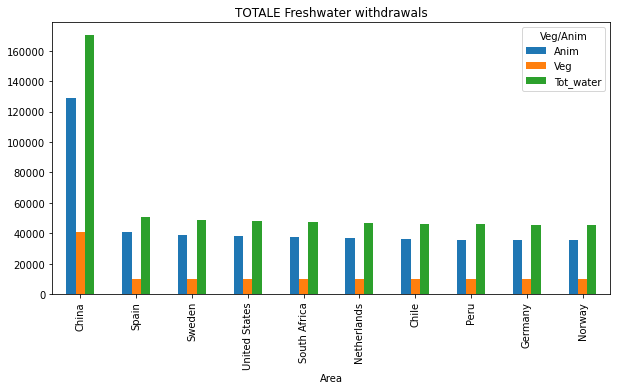

In [44]:
tot_sort_water.plot( kind='bar', figsize=(10,5)).set(title='TOTALE Freshwater withdrawals')


In [45]:
# GreenHouse consumption
join_green_house = join[["Area","Veg/Anim", 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)']]
join_green_house = join_green_house.groupby(["Area","Veg/Anim"]).sum().reset_index()

In [46]:
# GreenHouse consumption
join_2_green_house = join_green_house.sort_values(by="Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)")
join_2_green_house = join_2_green_house.pivot(index='Area', columns='Veg/Anim',values="Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)")
b  = join_2_green_house.reset_index()
b["Tot_green_house"] = b["Anim"] + b["Veg"]
b = b.set_index("Area")

tot_sort_green = b.sort_values(by="Tot_green_house", ascending=False).head(10)

[Text(0.5, 1.0, 'TOTALE Green House')]

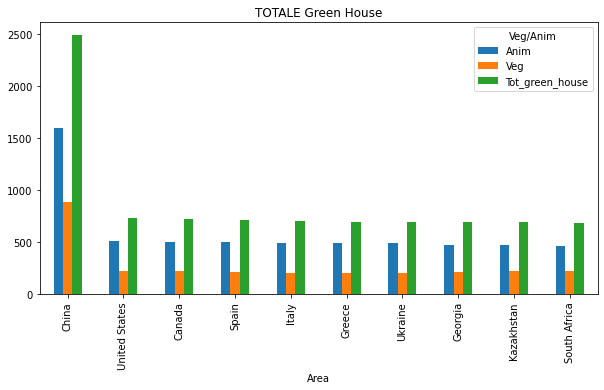

In [47]:
tot_sort_green.plot( kind='bar', figsize=(10,5)).set(title='TOTALE Green House')

In [48]:
# Land Usage consumption
join_land_house = join[["Area","Veg/Anim", 'Land use per kilogram (m² per kilogram)']]
join_land_house = join_land_house.groupby(["Area","Veg/Anim"]).sum().reset_index()

In [49]:
# Land Usage consumption
join_2_land_house = join_land_house.sort_values(by="Land use per kilogram (m² per kilogram)")
join_2_land_house = join_2_land_house.pivot(index='Area', columns='Veg/Anim',values="Land use per kilogram (m² per kilogram)")
b  = join_2_land_house.reset_index()
b["Tot_land_usage"] = b["Anim"] + b["Veg"]
b = b.set_index("Area")

tot_sort_land = b.sort_values(by="Tot_land_usage", ascending=False).head(10)

[Text(0.5, 1.0, 'TOTALE land usage')]

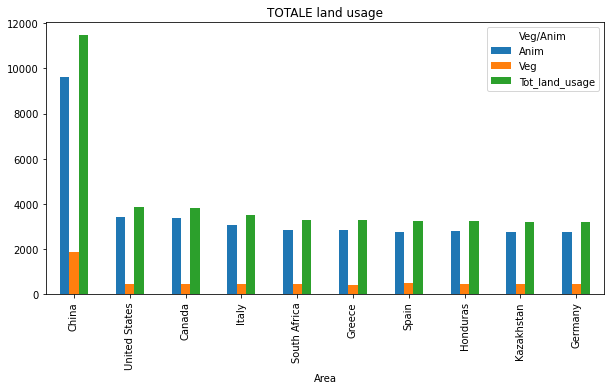

In [50]:
tot_sort_land.plot( kind='bar', figsize=(10,5)).set(title='TOTALE land usage')

In [51]:
# Total emission
join_emission= join[["Area","Veg/Anim", 'Total_emissions']]
join_emission = join_emission.groupby(["Area","Veg/Anim"]).sum().reset_index()

In [52]:
# Total emission
join_2_emission = join_emission.sort_values(by="Total_emissions")
join_2_emission = join_2_emission.pivot(index='Area', columns='Veg/Anim',values="Total_emissions")
b  = join_2_emission.reset_index()
b["Total emission"] = b["Anim"] + b["Veg"]
b = b.set_index("Area")

tot_sort_emission = b.sort_values(by="Total emission", ascending=False).head(10)



[Text(0.5, 1.0, 'TOTAL Emission')]

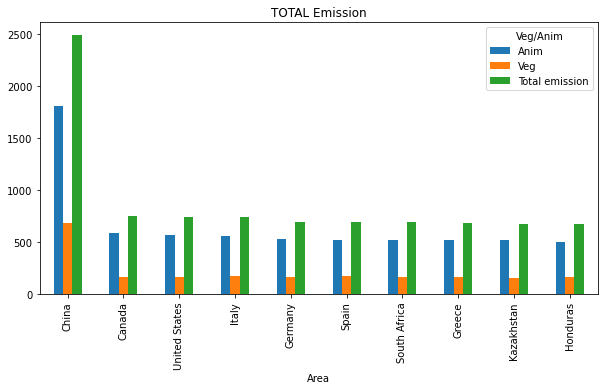

In [53]:
tot_sort_emission.plot( kind='bar', figsize=(10,5)).set(title='TOTAL Emission')

# Visualizzazioni

In [54]:
veg_group = veg.groupby('Type').sum().fillna(0)
inq_veg = veg_group[veg_group.index != 'Item'].div(veg_group.iloc[1]).T

anim_group = anim.groupby('Type').sum().fillna(0)
inq_anim = anim_group[anim_group.index != 'Item'].div(anim_group.iloc[1]).T

In [55]:
def normalize(arr):
    arr_norm = (arr - np.min(arr,axis = 0))/(np.max(arr,axis = 0)-np.min(arr,axis = 0))
    return arr_norm

In [159]:
inq_veg = normalize(inq_veg)
inq_veg.head(2)

Type,Freshwater_l_Kg,KgCO2_Kg,Scarcity-weighted_l_Kg,gPO4_Kg,m^2_Kg
1961,0.266038,0.629872,0.172648,0.563812,0.784707
1962,0.400372,0.789185,0.332218,0.668468,0.860470


In [160]:
inq_anim = normalize(inq_anim)
inq_anim.head(2)

Type,Freshwater_l_Kg,KgCO2_Kg,Scarcity-weighted_l_Kg,gPO4_Kg,m^2_Kg
1961,0.007277,0.837730,0.054922,0.000000,0.083531
1962,0.074691,0.815073,0.109090,0.078727,0.168426


In [161]:
inq_anim.index = inq_anim.index.str.replace("Y","")
inq_veg.index = inq_veg.index.str.replace("Y","")
inq_anim.head(2)

Type,Freshwater_l_Kg,KgCO2_Kg,Scarcity-weighted_l_Kg,gPO4_Kg,m^2_Kg
1961,0.007277,0.837730,0.054922,0.000000,0.083531
1962,0.074691,0.815073,0.109090,0.078727,0.168426


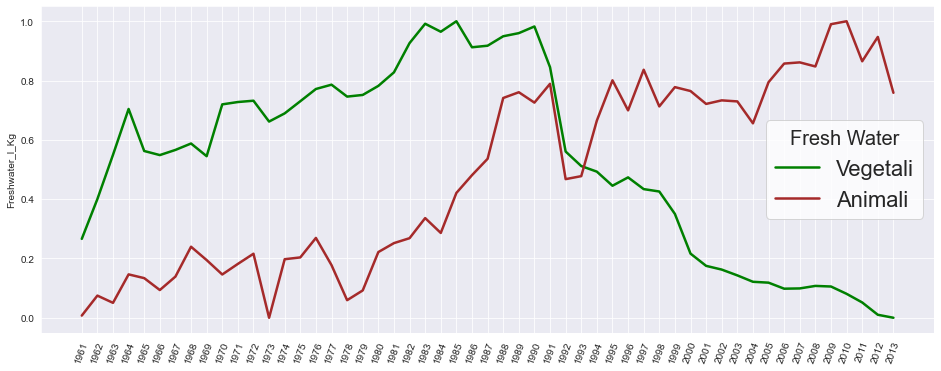

In [67]:
plt.figure(figsize=(16,6))
g = sns.lineplot(data=inq_veg, x=inq_veg.index, y="Freshwater_l_Kg", color="green", linewidth=2.5)
g = sns.lineplot(data=inq_anim, x=inq_anim.index, y="Freshwater_l_Kg", color="brown", linewidth=2.5)
plt.xticks(rotation=70)
legend = plt.legend(labels=["Vegetali", "Animali"], title = "Fresh Water", fontsize = 'large', title_fontsize = "20",  prop={'size': 22})
frame = legend.get_frame()
frame.set_facecolor('white')
sns.set_style('darkgrid')

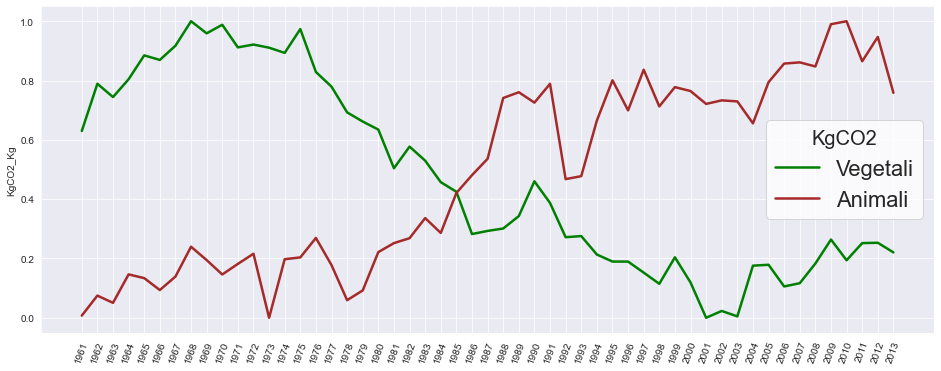

In [68]:
plt.figure(figsize=(16,6))
g = sns.lineplot(data=inq_veg, x=inq_veg.index, y="KgCO2_Kg",  color="green", linewidth=2.5)
g = sns.lineplot(data=inq_anim, x=inq_anim.index, y="Freshwater_l_Kg", color="brown", linewidth=2.5)
plt.xticks(rotation=70)
legend = plt.legend(labels=["Vegetali", "Animali"], title = "KgCO2", fontsize = 'large', title_fontsize = "20",  prop={'size': 22})
frame = legend.get_frame()
frame.set_facecolor('white')
sns.set_style('darkgrid')

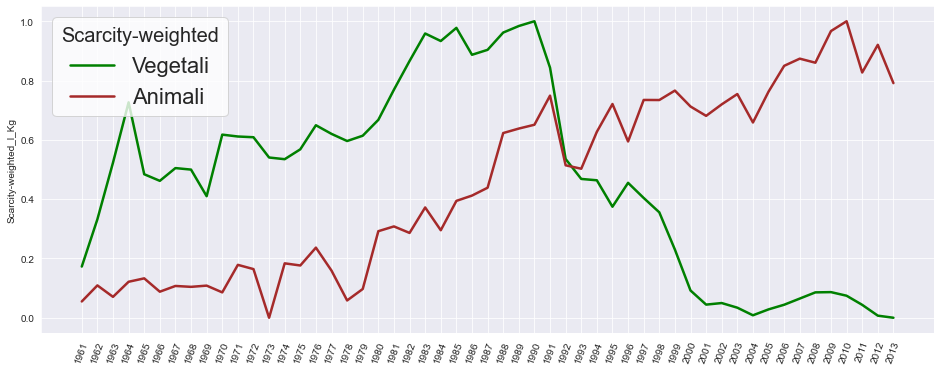

In [69]:

plt.figure(figsize=(16,6))
g = sns.lineplot(data=inq_veg, x=inq_veg.index, y="Scarcity-weighted_l_Kg",  color="green", linewidth=2.5)
g = sns.lineplot(data=inq_anim, x=inq_anim.index, y="Scarcity-weighted_l_Kg", color="brown", linewidth=2.5)
plt.xticks(rotation=70)
legend = plt.legend(labels=["Vegetali", "Animali"], title = "Scarcity-weighted", fontsize = 'large', title_fontsize = "20",  prop={'size': 22})
frame = legend.get_frame()
frame.set_facecolor('white')
sns.set_style('darkgrid')

In [102]:
dataset = join[["Area","Food product","Land use change", "Animal Feed", "Farm", "Processing", "Transport", "Packging", "Retail", "Veg/Anim"]]
dataset_a = dataset.groupby(["Area"]).sum().reset_index()

dataset_sum = pd.DataFrame(dataset_a.sum(), columns=["sum"]).T
dataset_sum

,Area,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail
sum,AfghanistanAlbaniaAlgeriaAngolaAntigua and Bar...,16153.0,8230.6,61518.96,3943.82,4007.6,5556.38,990.2


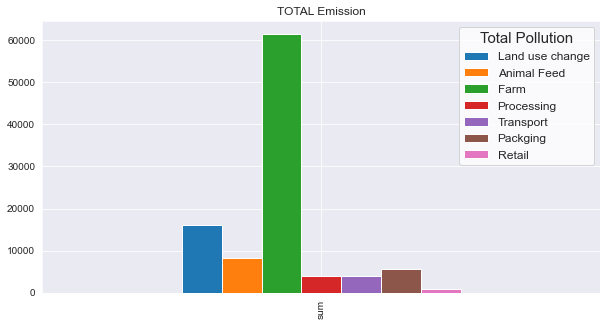

In [158]:
dataset_sum.plot( kind='bar', figsize=(10,5)).set(title='TOTAL Emission')
legend = plt.legend( title = "Total Pollution", fontsize = 'large', title_fontsize = "15",  prop={'size': 12})
frame = legend.get_frame()
frame.set_facecolor('white')

In [155]:
dataset_veg = dataset.loc[dataset['Veg/Anim'].isin(["Veg"])] 
dataset_veg_gb = dataset_veg.groupby(["Area"]).sum().reset_index()
dataset_anim = dataset.loc[dataset['Veg/Anim'].isin(["Anim"])] 
dataset_anim_gb = dataset_anim.groupby(["Area"]).sum().reset_index()


In [154]:
dataset_sum_anim = pd.DataFrame(dataset_anim_gb.sum(), columns=["Anim"]).T
dataset_sum_veg = pd.DataFrame(dataset_veg_gb.sum(), columns=["Veg"]).T
dataset_concat= pd.concat([dataset_sum_anim,dataset_sum_veg])
dataset_concat

,Area,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail
Anim,AfghanistanAlbaniaAlgeriaAngolaAntigua and Bar...,11914.48,8230.6,46259.0,2052.68,1630.52,1653.12,808.1
Veg,AfghanistanAlbaniaAlgeriaAngolaAntigua and Bar...,4238.52,0.0,15259.96,1891.14,2377.08,3903.26,182.1


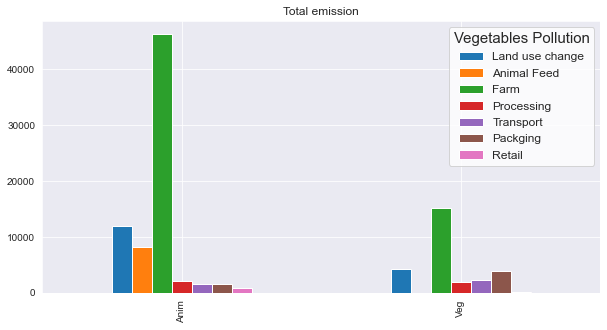

In [156]:
dataset_concat.plot( kind='bar', figsize=(10,5)).set(title='Total emission')
legend = plt.legend( title = "Vegetables Pollution", fontsize = 'large', title_fontsize = "15",  prop={'size': 12})
frame = legend.get_frame()
frame.set_facecolor('white')